In [1]:
import lightkurve as lk

In [76]:
search_result = lksearch_result = lk.search_targetpixelfile(254113311, mission='TESS', sector=1)

Could not resolve 254113311 to a sky position.


In [68]:
search_result

SearchResult containing 0 data products.

In [4]:
tpf = search_result.download(quality_bitmask='default')

In [6]:
tpf

TessTargetPixelFile(TICID: 261136679)

In [7]:
tpf.mission

'TESS'

In [75]:
tpf.targetid

261136679

In [9]:
tpf.sector

1

In [10]:
tpf.camera

4

In [11]:
tpf.ccd

2

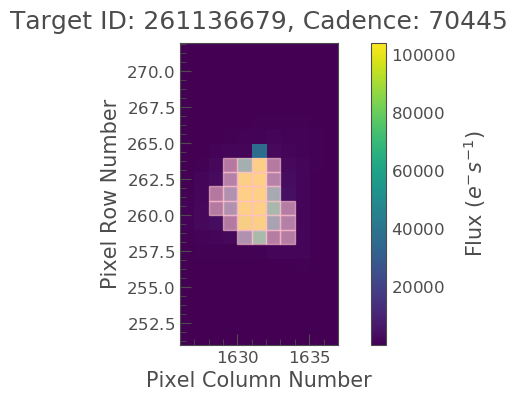

In [12]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask);

In [13]:
tpf.hdu

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fd1b3466150>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fd1b3608710>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fd1b3429e50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fd1b5bbafd0>]

In [14]:
tpf.time

array([1325.29698328, 1325.29837215, 1325.29976102, ..., 1353.17431099,
       1353.17569985, 1353.17708871])

In [15]:
tpf.flux

array([[[  -1.3825388,  -37.66533  ,  -91.830536 , ..., -108.04645  ,
         -103.54175  , -134.1816   ],
        [-135.68407  , -125.30367  , -112.52773  , ..., -113.03839  ,
         -122.92997  , -131.28302  ],
        [-147.63722  , -142.73625  , -134.99854  , ..., -101.330734 ,
         -114.31767  , -121.03055  ],
        ...,
        [-138.13503  , -137.8448   , -146.29425  , ...,  -77.273094 ,
         -105.22347  , -135.82652  ],
        [-142.20255  , -139.6766   , -147.65201  , ..., -118.81814  ,
         -129.52805  , -130.46175  ],
        [-133.71326  , -134.32669  , -148.82013  , ..., -127.16725  ,
          -90.90953  , -112.974434 ]],

       [[  -3.390986 ,  -47.140965 ,  -90.53796  , ..., -106.87563  ,
         -108.55464  , -136.6413   ],
        [-133.7175   , -125.38933  , -114.30842  , ..., -115.82087  ,
         -125.8608   , -132.87209  ],
        [-147.48918  , -142.87836  , -138.43767  , ..., -103.16773  ,
         -116.372955 , -119.86726  ],
        ...,


In [16]:
tpf.flux[0]

array([[-1.38253880e+00, -3.76653290e+01, -9.18305359e+01,
        -1.29922272e+02, -1.45692978e+02, -1.35893311e+02,
        -9.54683685e+01, -8.85729370e+01, -1.08046448e+02,
        -1.03541748e+02, -1.34181595e+02],
       [-1.35684067e+02, -1.25303673e+02, -1.12527733e+02,
        -1.35690414e+02, -1.45928650e+02, -1.27757614e+02,
        -6.09818077e+01, -7.37526398e+01, -1.13038391e+02,
        -1.22929970e+02, -1.31283020e+02],
       [-1.47637222e+02, -1.42736252e+02, -1.34998535e+02,
        -1.41663147e+02, -1.40064377e+02, -1.18161720e+02,
        -5.37216644e+01, -6.23722382e+01, -1.01330734e+02,
        -1.14317673e+02, -1.21030548e+02],
       [-1.49992447e+02, -1.43351776e+02, -1.39589264e+02,
        -1.37442719e+02, -1.31207718e+02, -9.68078690e+01,
        -1.37817793e+01, -3.41951828e+01, -7.66406403e+01,
        -8.33256989e+01, -8.85187225e+01],
       [-1.37578445e+02, -1.28364151e+02, -1.26376915e+02,
        -1.21656555e+02, -1.14596848e+02, -5.06528702e+01,
  

In [17]:
lc = tpf.to_lightcurve()

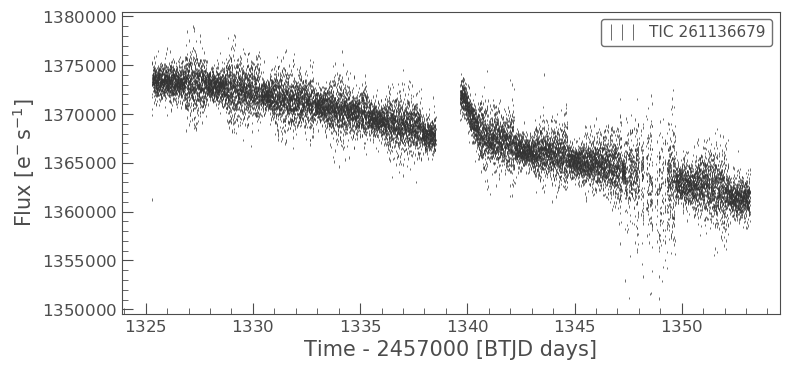

In [18]:
lc.errorbar();

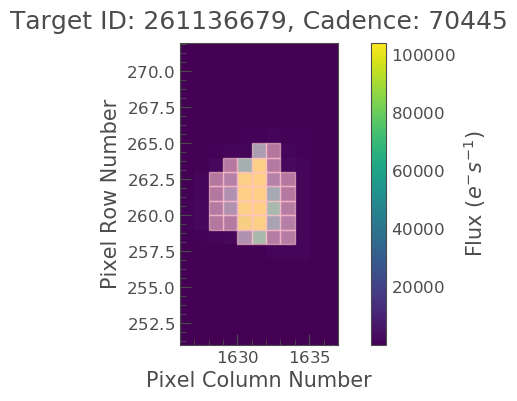

In [19]:
aperture_mask = tpf.create_threshold_mask(threshold=10)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

In [20]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)

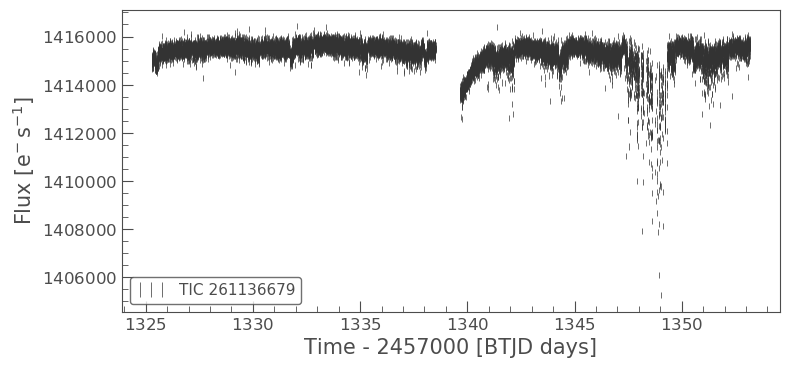

In [21]:
lc.errorbar();

In [22]:
# Number of cadences in the full light curve
print(lc.time.shape)

(18104,)


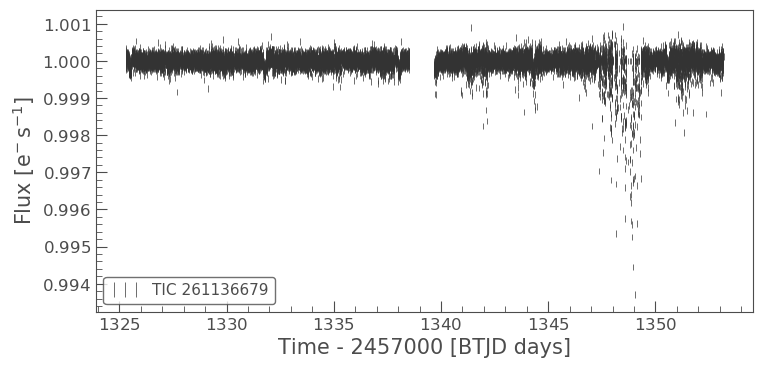

In [23]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

In [24]:
# Flag the times that are good quality
mask = (flat_lc.time < 1346) | (flat_lc.time > 1350)

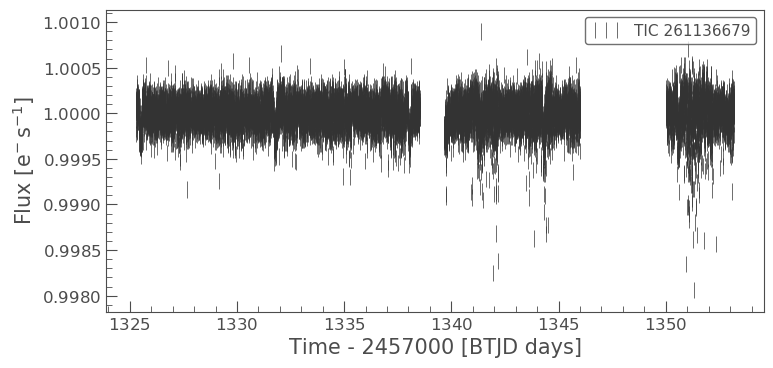

In [25]:
masked_lc = flat_lc[mask]
masked_lc.errorbar();

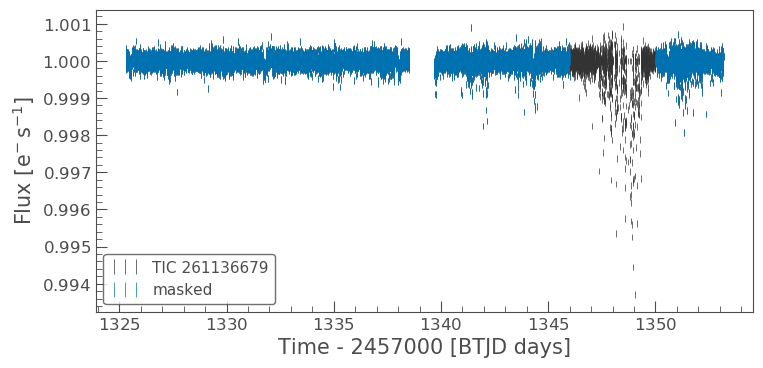

In [26]:
# First define the `matplotlib.pyplot.axes`
ax = flat_lc.errorbar()

# Pass that axis to the next plot
masked_lc.errorbar(ax=ax, label='masked');

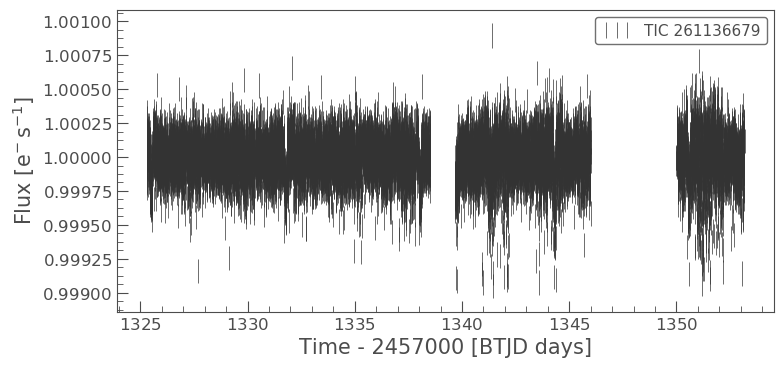

In [27]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.errorbar();

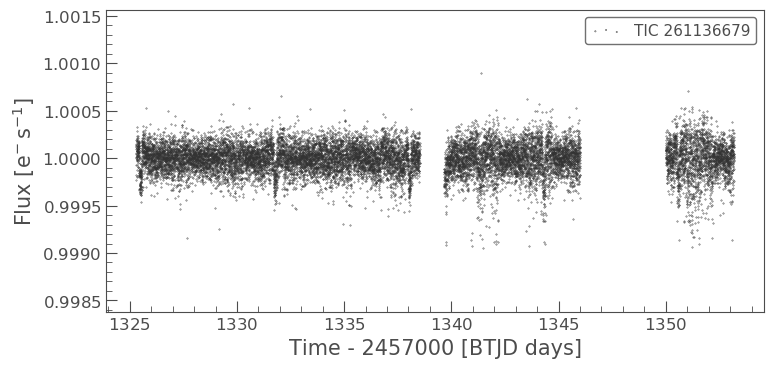

In [28]:
clipped_lc.scatter(s=0.1);

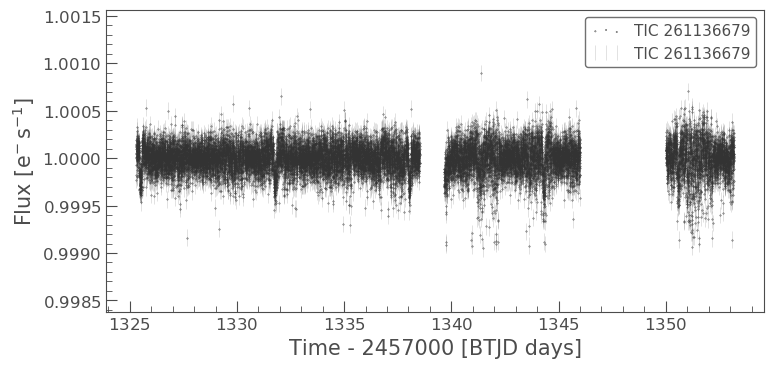

In [29]:
ax = clipped_lc.scatter(s=0.1)
clipped_lc.errorbar(ax=ax, alpha=0.2);  # alpha determines the transparency

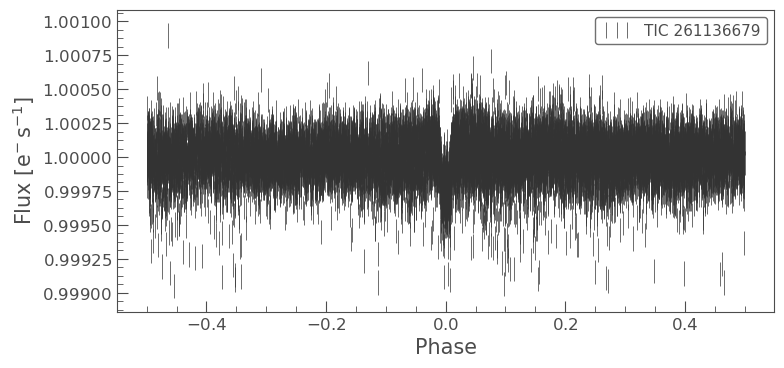

In [30]:
folded_lc = clipped_lc.fold(period=6.27, t0=1325.504)
folded_lc.errorbar();

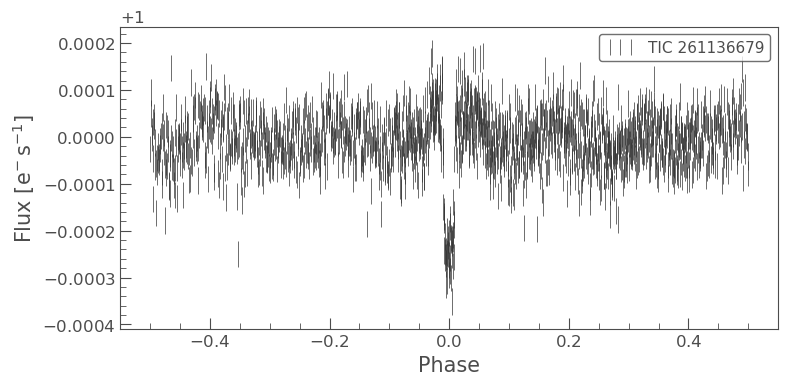

In [31]:
binned_lc = folded_lc.bin(binsize=10)  # Average 10 points per bin
binned_lc.errorbar();

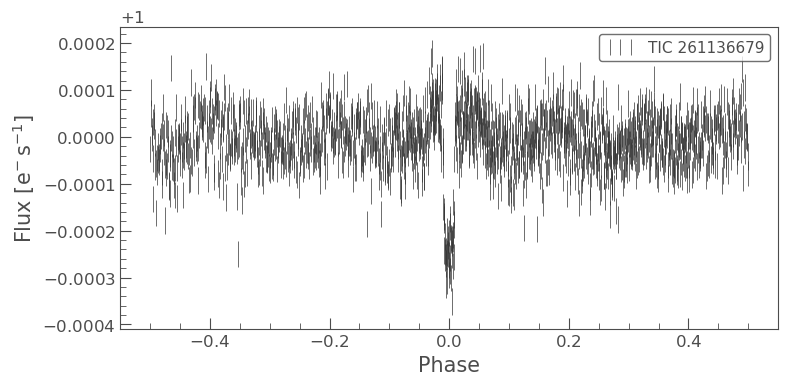

In [32]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)
lc = lc[(lc.time < 1346) | (lc.time > 1350)]
lc.remove_outliers(sigma=6).fold(period=6.27, t0=1325.504).bin(binsize=10).errorbar();

In [33]:
# Use the default
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask).flatten(window_length=1001)
lc = lc[(lc.time < 1346) | (lc.time > 1350)].remove_outliers(6).fold(period=6.27, t0=1325.504).bin(10)

# Use a custom aperture
custom_lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)
custom_lc = custom_lc[(custom_lc.time < 1346) | (custom_lc.time > 1350)].remove_outliers(6).fold(period=6.27, t0=1325.504).bin(10)

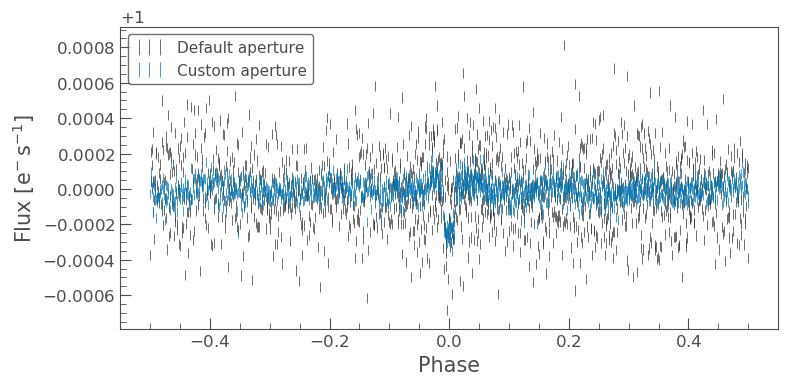

In [34]:
ax = lc.errorbar(label='Default aperture')
custom_lc.errorbar(ax=ax, label='Custom aperture');